# Case Study


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams["figure.figsize"] = (16, 9)

DATA_PATH = "../data/raw"
url_jobs = os.path.join(DATA_PATH, "ch5_employment.csv")


In [2]:
# Read in jobs file
jobs = pd.read_csv(url_jobs, parse_dates=["datestamp"], index_col=["datestamp"])

# Print first five lines of your DataFrame
print(jobs.head(5))

# Check the type of each column in your DataFrame
print(jobs.dtypes)

# Convert datestamp column to a datetime object
# jobs[____] = ____(jobs[____])

# Set the datestamp columns as the index of your DataFrame
# jobs = ____('datestamp')

# Check the number of missing values in each column
print(jobs.isnull().sum())


            Agriculture  Business services  Construction  \
datestamp                                                  
2000-01-01         10.3                5.7           9.7   
2000-02-01         11.5                5.2          10.6   
2000-03-01         10.4                5.4           8.7   
2000-04-01          8.9                4.5           5.8   
2000-05-01          5.1                4.7           5.0   

            Durable goods manufacturing  Education and Health  Finance  \
datestamp                                                                
2000-01-01                          3.2                   2.3      2.7   
2000-02-01                          2.9                   2.2      2.8   
2000-03-01                          2.8                   2.5      2.6   
2000-04-01                          3.4                   2.1      2.3   
2000-05-01                          3.4                   2.7      2.2   

            Government  Information  Leisure and hospitality

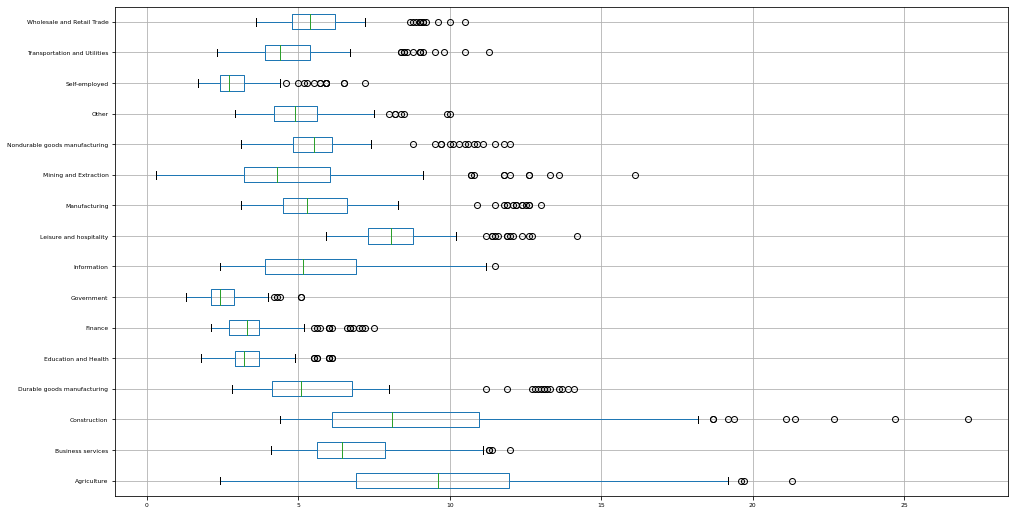

       Agriculture  Business services  Construction  \
count   122.000000         122.000000    122.000000   
mean      9.840984           6.919672      9.426230   
std       3.962067           1.862534      4.587619   
min       2.400000           4.100000      4.400000   
25%       6.900000           5.600000      6.100000   
50%       9.600000           6.450000      8.100000   
75%      11.950000           7.875000     10.975000   
max      21.300000          12.000000     27.100000   

       Durable goods manufacturing  Education and Health     Finance  \
count                   122.000000            122.000000  122.000000   
mean                      6.025410              3.420492    3.540164   
std                       2.854475              0.877538    1.235405   
min                       2.800000              1.800000    2.100000   
25%                       4.125000              2.900000    2.700000   
50%                       5.100000              3.200000    3.300000   


In [3]:
# Generate a boxplot
jobs.boxplot(fontsize=6, vert=False)
plt.show()

# Generate numerical summaries
print(jobs.describe())

# Print the name of the time series with the highest mean
print("Agriculture")

# Print the name of the time series with the highest variability
print("Construction")


## Beyond summary statistics 


            Finance  Information  Manufacturing  Construction
datestamp                                                    
2000-01-01      2.7          3.4            3.6           9.7
2000-02-01      2.8          2.9            3.4          10.6
2000-03-01      2.6          3.6            3.6           8.7
2000-04-01      2.3          2.4            3.7           5.8
2000-05-01      2.2          3.5            3.4           5.0


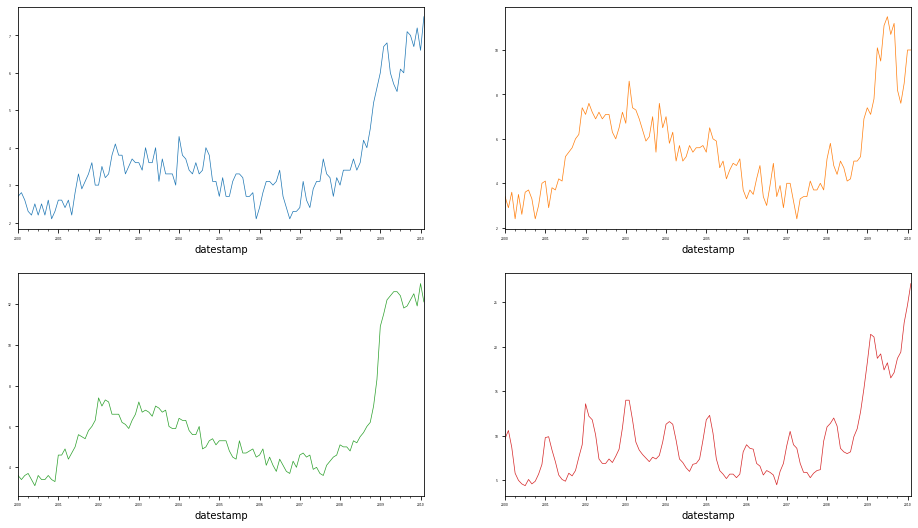

In [4]:
# A subset of the jobs DataFrame
jobs_subset = jobs[["Finance", "Information", "Manufacturing", "Construction"]]

# Print the first 5 rows of jobs_subset
print(jobs_subset.head(5))

# Create a facetted graph with 2 rows and 2 columns
ax = jobs_subset.plot(
    subplots=True,
    layout=(2, 2),
    sharex=False,
    sharey=False,
    linewidth=0.7,
    fontsize=3,
    legend=False,
)

plt.show()


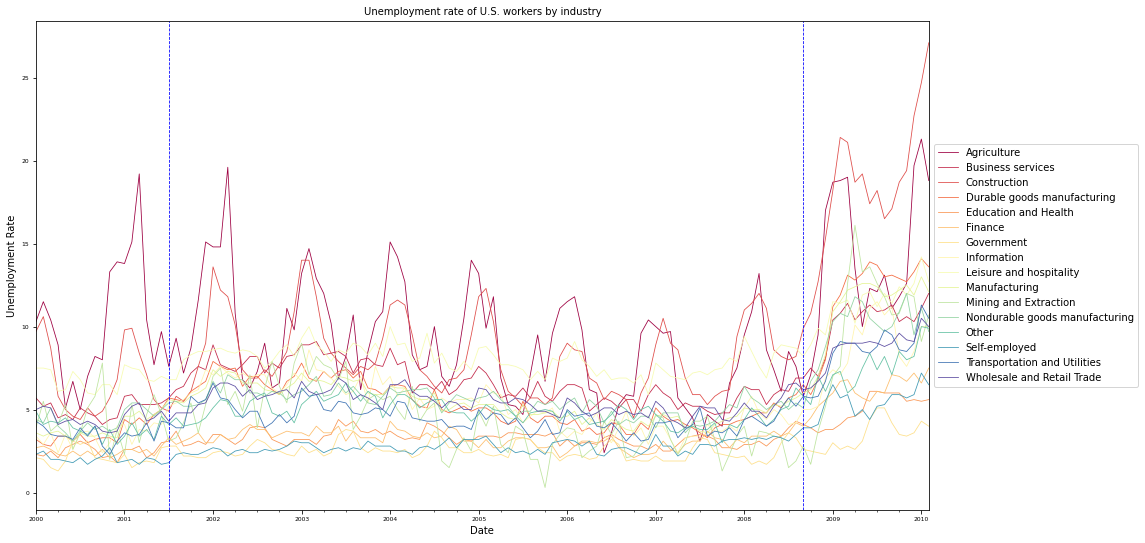

In [5]:
# Plot all time series in the jobs DataFrame
ax = jobs.plot(colormap="Spectral", fontsize=6, linewidth=0.8)

# Set labels and legend
ax.set_xlabel("Date", fontsize=10)
ax.set_ylabel("Unemployment Rate", fontsize=10)
ax.set_title("Unemployment rate of U.S. workers by industry", fontsize=10)
ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

# Annotate your plots with vertical lines
ax.axvline("2001-07-01", color="blue", linestyle="--", linewidth=0.8)
ax.axvline("2008-09-01", color="blue", linestyle="--", linewidth=0.8)

# Show plot
plt.show()


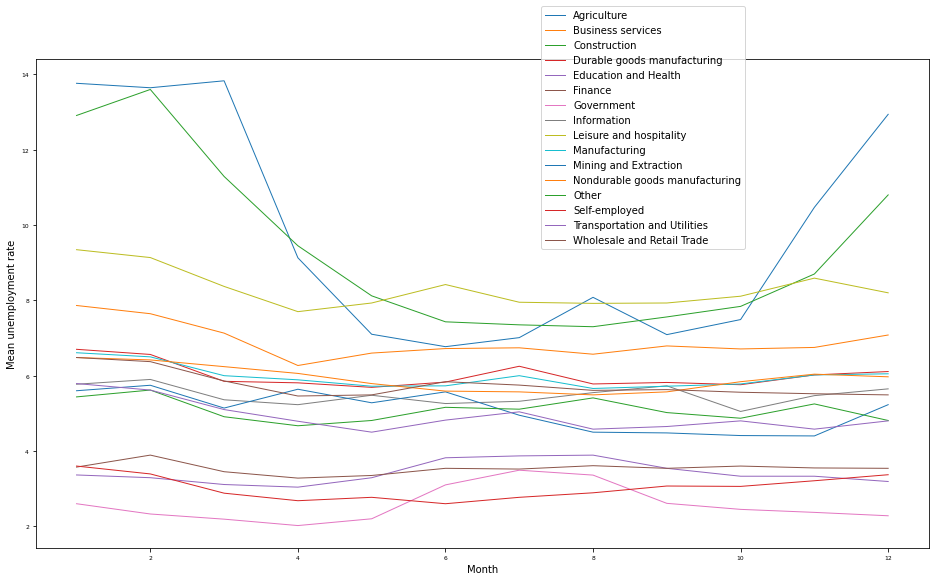

In [6]:
# Extract the month from the index of jobs
index_month = jobs.index.month

# Compute the mean unemployment rate for each month
jobs_by_month = jobs.groupby(index_month).mean()

# Plot the mean unemployment rate for each month
ax = jobs_by_month.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel("Month", fontsize=10)
ax.set_ylabel("Mean unemployment rate", fontsize=10)
ax.legend(bbox_to_anchor=(0.8, 0.6), fontsize=10)
plt.show()


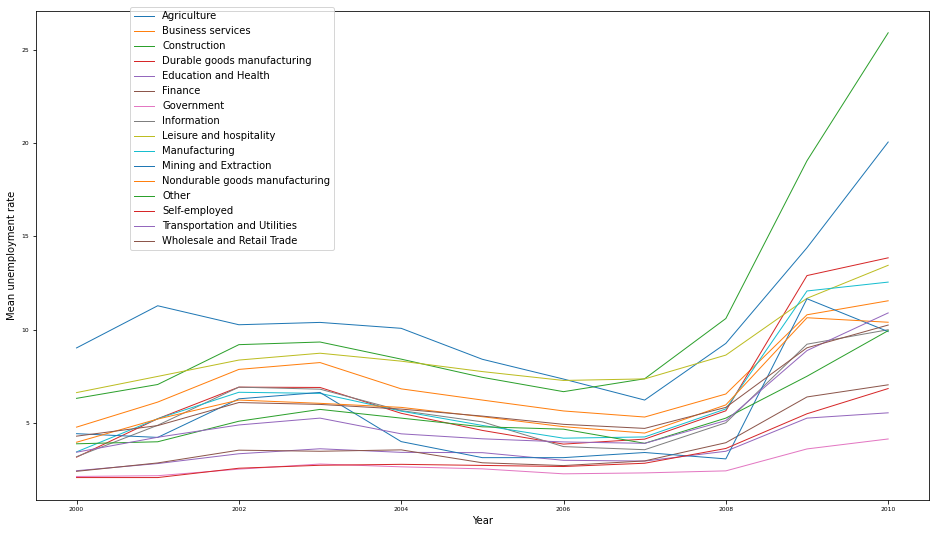

In [7]:
# Extract of the year in each date indices of the jobs DataFrame
index_year = jobs.index.year

# Compute the mean unemployment rate for each year
jobs_by_year = jobs.groupby(index_year).mean()

# Plot the mean unemployment rate for each year
ax = jobs_by_year.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel("Year", fontsize=10)
ax.set_ylabel("Mean unemployment rate", fontsize=10)
ax.legend(bbox_to_anchor=(0.1, 0.5), fontsize=10)
plt.show()


## Decompose time-series


In [8]:
import statsmodels.api as sm


/usr/lib/python3/dist-packages/cvxopt/__init__.py:136: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if val is 0: val = None


In [9]:
# Initialize dictionary
jobs_decomp = {}

# Get the names of each time series in the DataFrame
jobs_names = jobs.columns

# Run time series decomposition on each time series of the DataFrame
for ts in jobs_names:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    jobs_decomp[ts] = ts_decomposition


In [11]:
jobs_seasonal = {}


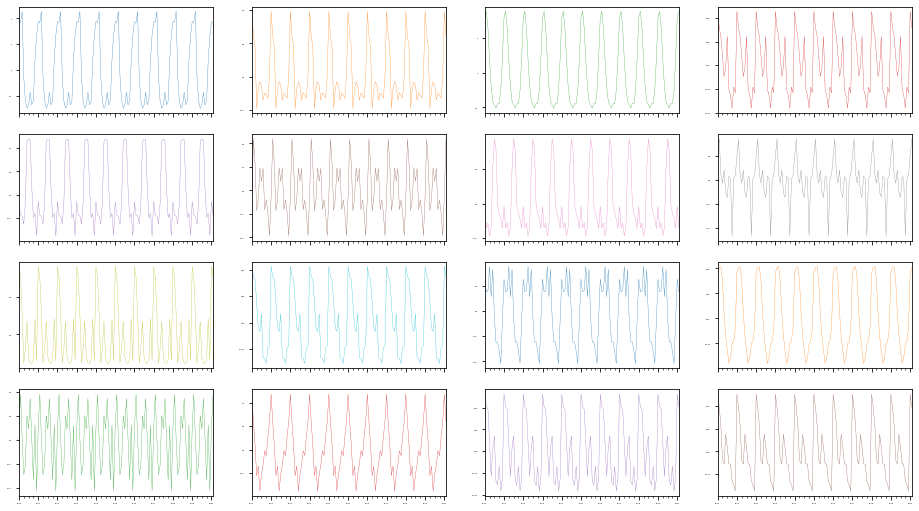

In [12]:
# Extract the seasonal values for the decomposition of each time series
for ts in jobs_names:
    jobs_seasonal[ts] = jobs_decomp[ts].seasonal

# Create a DataFrame from the jobs_seasonal dictionary
seasonality_df = pd.DataFrame.from_dict(jobs_seasonal)

# Remove the label for the index
seasonality_df.index.name = None

# Create a faceted plot of the seasonality_df DataFrame
seasonality_df.plot(
    subplots=True, layout=(4, 4), sharey=False, fontsize=2, linewidth=0.3, legend=False
)

# Show plot
plt.show()


## Correlations between time series


In [13]:
import seaborn as sns


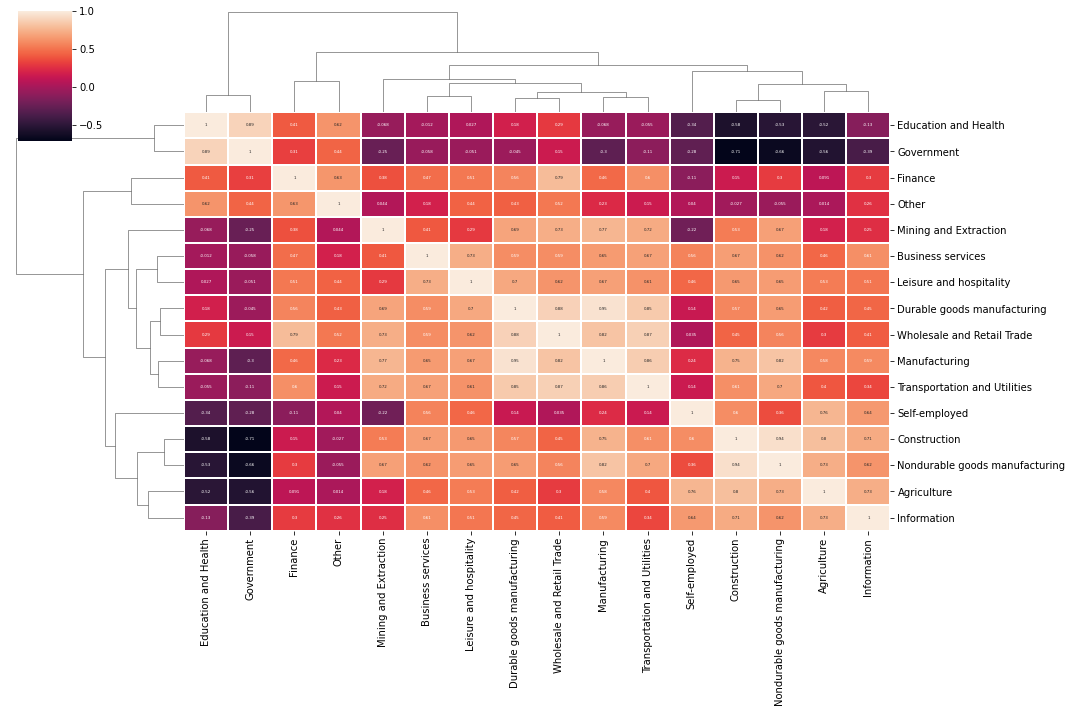

0.89


In [18]:
# Get correlation matrix of the seasonality_df DataFrame
seasonality_corr = seasonality_df.corr(method="spearman")

# Customize the clustermap of the seasonality_corr correlation matrix
fig = sns.clustermap(
    seasonality_corr,
    annot=True,
    annot_kws={"size": 4},
    linewidths=0.4,
    figsize=(15, 10),
)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()

# Print the correlation between the seasonalities of the Government and Education & Health industries
print(0.89)
